### Defenition of done

- [X]  Соберите данные из двух разных источников (открытый датасет + веб-скрейпинг или API).
    
    Стоит учитывать, что датасет, который вы сформируете на данном этапе пригодится вам для дальнейшего задания.
    
- [X]  Проведите их агрегацию, создав единый датасет.
- [X]  Проведите разведывательный анализ данных (EDA).
- [X]  Постройте базовые визуализации для основных признаков с учетом разметки данных.
- [X]  Опишите возможные применения этих данных в контексте машинного обучения.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from wordcloud import WordCloud


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Обьединение. Данный подход уже реализован в dagster-пайплайне

In [2]:
citywalls = pd.read_parquet('data/citywalls_data.parquet')
opendata = pd.read_parquet('data/spb_open_data.parquet')

In [3]:
display(citywalls.head())
display(opendata.head())

,Улица,Название,Фото,Адрес,Архитекторы,Год постройки,Стиль,Комментарии,Ссылка
0,Абросимова ул.,Доходный дом,https://p1.citywalls.ru/thumb0_484-496053.jpg?...,"Абросимова ул., 4",None,None,Модерн,1,https://www.citywalls.ru/house32372.html?s=kbl...
1,Абросимова ул.,Доходный дом,https://p3.citywalls.ru/thumb0_220-225411.jpg?...,"Абросимова ул., 14",None,None,Рядовая застройка,8,https://www.citywalls.ru/house26293.html?s=kbl...
2,Александровская станция,Вокзал станции Александровская,https://p2.citywalls.ru/thumb0_123-126854.jpg?...,"Александровская станция, 1",Сальмонович П. О.,1860-1869,Эклектика,22,https://www.citywalls.ru/house21587.html?s=kbl...
3,Александровская станция,Станция Александровская. Багажное отделение,https://p0.citywalls.ru/thumb0_123-126856.jpg?...,"Александровская станция, 2",Сальмонович П. О.,1860-1869,Эклектика,0,https://www.citywalls.ru/house21588.html?s=kbl...
4,Александровская станция,Станция Александровская. Водоподъемное здание,https://p2.citywalls.ru/thumb0_123-126858.jpg?...,"Александровская станция, 3",Сальмонович П. О.,1860-1869,Эклектика,37,https://www.citywalls.ru/house21589.html?s=kbl...


,Улица,Дом,Корпус,Литера,Район,Тип коммунальной квартиры,Количество коммунальных квартир,Общее количество комнат в коммунальных квартирах,"Серия, тип проекта",Год постройки,Год проведения реконструкции,"Общая площадь здания, м2","Площадь жилых помещений, м2","Площадь нежилых помещений функционального назначения, м2",Число лестниц,Число этажей,Количество проживающих,"Площадь мансард, м2",Центральное отопление,Автономная котельная,Печное отопление,Центральное горячее водоснабжение,Горячее водоснабжение от газовых колонок,Горячее водоснабжение от дровяных колонок,Центральное электроснабжение,Центральное газоснабжение,Не центральное газоснабжение,Мусоропроводы,Тип квартиры,Количество квартир,Общее количество комнат в не коммунальных квартирах,Количество встроенных нежилых помещений,Год ввода лифтов в эксплуатацию,Год реконструкции лифтов,Год модернизации лифтов,"Общая площадь уборки придомовых территорий, м2",Дата составления ТЭП,Полное наименование управляющей компании,Аварийность,Год проведения капитального ремонта,Виды работ,Количество стволов мусоропровода,Площадь металлической кровли,Общее количество лифтов,Количество ПЗУ,"Площадь подвалов, м2",Порядковый номер,Адрес
0,13-я Красноармейская ул,14,None,А,Адмиралтейский,"3 комн.,4 комн.,5 комн.,6 комн","6,5,2,1","18,20,10,6",Индивидуальный,1902,None,3591.0,2969.21,196.79,5.0,6.0,158.0,NaN,1,0,0,1,0,0,1,1,0,0,"1 комн.,2 комн.,3 комн.,4 комн.,5 комн","2,6,14,2,1","2,12,42,8,5",2.0,1981,2019,None,335.0,2009-04-12,"ООО ""ЖИЛКОМСЕРВИС №1 АДМИРАЛТЕЙСКОГО РАЙОНА""",0,2000;2008;2009;2010;2013;2014;2015;2015;2019,"Заделка трещин, сколов и повреждений;Вывешиван...",NaN,1223.0,1.0,3.0,213.0,5571,"13-я Красноармейская улица, дом 14, литера А"
1,13-я Красноармейская ул,16,None,А,Адмиралтейский,"2 комн.,3 комн.,4 комн","1,2,4","2,6,16",Индивидуальный,до 1917,1965,2023.4,1871.20,NaN,1.0,6.0,81.0,NaN,1,0,0,1,0,0,1,1,0,0,"2 комн.,3 комн.,4 комн","1,4,6","2,12,24",NaN,1965,None,2007,395.0,2012-02-10,"ООО ""ЖИЛКОМСЕРВИС №1 АДМИРАЛТЕЙСКОГО РАЙОНА""",0,2005;2007,"Вывешивание и выравнивание перегородок, замена...",NaN,590.0,1.0,1.0,414.2,15781,"13-я Красноармейская улица, дом 16, литера А"
2,13-я Красноармейская ул,20,None,А,Адмиралтейский,"3 комн.,4 комн.,6 комн","3,1,1","9,4,6",Индивидуальный,1893,None,1952.9,1607.20,NaN,3.0,5.0,82.0,NaN,1,0,0,1,0,0,1,1,0,0,"1 комн.,2 комн.,3 комн.,4 комн.,6 комн","4,9,7,2,1","4,18,21,8,6",NaN,None,None,None,217.0,2012-02-10,"ООО ""ЖИЛКОМСЕРВИС №1 АДМИРАЛТЕЙСКОГО РАЙОНА""",0,2011;2011;2007;2007;2007;2002;2016;2020;2020,Очистка и антисептирование древесины;Вывешиван...,NaN,699.0,NaN,1.0,517.6,2392,"13-я Красноармейская улица, дом 20, литера А"
3,4-я Красноармейская ул,18б,None,А,Адмиралтейский,"3 комн.,4 комн.,5 комн.,6 комн.,7 комн","1,1,3,3,2","3,4,15,18,14",Индивидуальный,1906,None,3230.5,2596.12,201.38,4.0,6.0,130.0,NaN,1,0,0,1,0,0,1,1,0,0,"1 комн.,2 комн.,3 комн.,4 комн","1,4,7,3","1,8,21,12",3.0,"1976, 1977",2019,None,265.0,2013-05-21,"ООО ""ЖИЛКОМСЕРВИС №1 АДМИРАЛТЕЙСКОГО РАЙОНА""",0,2010;2010;2010;2010;2010;2010;2008;2005;2019,"Заделка трещин, сколов и повреждений;Ремонт ка...",NaN,1091.0,2.0,4.0,754.0,10652,"4-я Красноармейская улица, дом 18б, литера А"
4,5-я Красноармейская ул,30,None,А,Адмиралтейский,None,None,None,Индивидуальный,1906,2009,1861.0,877.30,645.00,1.0,4.0,40.0,512.1,1,0,0,1,0,0,1,1,0,0,"1 комн.,2 комн.,3 комн.,4 комн.,7 комн","1,1,2,1,2","1,2,6,4,14",0.0,None,None,None,185.0,2013-05-21,"ООО ""ЖИЛКОМСЕРВИС №1 АДМИРАЛТЕЙСКОГО РАЙОНА""",0,2010;2010;2010;2010;2010;2008;2006;2003,Ремонт каркаса;Утепление промерзающих участков...,NaN,468.0,NaN,1.0,561.6,2478,"5-я Красноармейская улица, дом 30, литера А"


## Разделение адреса на компоненты

Подобное разделение уже реализовано в данных с гос. портала, приведем к нему и соскрепенные с citywalls адреса.

In [4]:

def split_addresses(df, address_col='Адрес', street_col='Улица'):
    """
    Разделяет составные адреса на отдельные строки
    """
    # Получаем все уникальные улицы, отсортированные по длине
    all_streets = sorted(list(df[street_col].dropna().unique()), key=len, reverse=True)
    
    expanded_rows = []
    
    for _, row in df.iterrows():
        address = row[address_col]
        # Находим все улицы в адресе
        found_streets = []
        for street in all_streets:
            if street in address:
                # Проверяем, что это полное вхождение улицы
                start_idx = address.find(street)
                end_idx = start_idx + len(street)
                
                # Улица должна заканчиваться запятой или быть в конце строки
                if end_idx == len(address) or address[end_idx] in [',', ' ']:
                    found_streets.append((street, start_idx))
        
        # Сортируем улицы по позиции в адресе
        found_streets.sort(key=lambda x: x[1])
        
        # Если улиц не найдено или только одна, сохраняем оригинальную строку
        if len(found_streets) <= 1:
            expanded_rows.append(row.to_dict())
            continue
        
        # Создаем отдельные строки для каждой улицы
        for i, (street, start_idx) in enumerate(found_streets):
            # Определяем границы текущего адреса
            end_idx = len(address)
            if i < len(found_streets) - 1:
                end_idx = found_streets[i + 1][1]
            
            # Извлекаем адрес
            single_address = address[start_idx:end_idx].strip()
            
            # Создаем новую строку
            new_row = row.to_dict()
            new_row[address_col] = single_address
            new_row[street_col] = street
            expanded_rows.append(new_row)
    
    return pd.DataFrame(expanded_rows)


def extract_address_components(df, address_col='Адрес', street_col='Улица'):
    """
    Улучшенная функция извлечения компонентов адреса
    """
    def parse_address(address, street):
        # Проверяем наличие улицы и запятой
        if street not in address or ',' not in address:
            return (None, None, None)
        
        # Извлекаем часть после названия улицы и запятой
        street_end = address.find(street) + len(street)
        comma_idx = address.find(',', street_end)
        if comma_idx == -1:
            return (None, None, None)
        
        address_part = address[comma_idx + 1:].strip()
        
        # Извлекаем номер дома
        house_match = re.match(r'^(\d+)', address_part)
        if not house_match:
            return (None, None, None)
        
        house_number = house_match.group(1)
        remaining = address_part[len(house_number):].strip()
        
        # Определяем компоненты адреса
        corpus = None
        liter = None
        
        # Проверка на формат "кN" для корпуса
        if remaining.startswith('к') and len(remaining) > 1 and remaining[1].isdigit():
            corpus_match = re.match(r'к(\d+)', remaining)
            if corpus_match:
                corpus = corpus_match.group(1)
                remaining = remaining[len(f'к{corpus}'):].strip()
        # Проверка на диапазон корпусов (например, "1-3", "5-6")
        elif re.match(r'^\s*(\d+\-\d+)', remaining):
            corpus_match = re.match(r'^\s*(\d+\-\d+)', remaining)
            corpus = corpus_match.group(1)
            remaining = remaining[corpus_match.end():].strip()
        # Проверка на дробный корпус (например, "10/11")
        elif re.match(r'^\s*(\d+\/\d+)', remaining):
            corpus_match = re.match(r'^\s*(\d+\/\d+)', remaining)
            corpus = corpus_match.group(1)
            remaining = remaining[corpus_match.end():].strip()
        # Проверка на буквенные корпуса А и Б, которые указаны в эталонных данных
        elif remaining and remaining[0] in ['А', 'Б'] and (len(remaining) == 1 or not remaining[1].isalpha()):
            corpus = remaining[0]
            remaining = remaining[1:].strip()
        # Проверка на числовой корпус
        elif remaining and remaining[0].isdigit():
            digit_match = re.match(r'(\d+)', remaining)
            if digit_match:
                corpus = digit_match.group(1)
                remaining = remaining[len(corpus):].strip()
                
        # Если после извлечения корпуса остались одна или несколько букв,
        # считаем это литером (включая строчную "х")
        if remaining:
            # Находим одиночную букву в начале оставшейся части
            if len(remaining) >= 1 and remaining[0].isalpha():
                # Если это одиночная буква (как "х" в "2х")
                if len(remaining) == 1:
                    liter = remaining
                # Если буква в начале, но есть и другие символы
                else:
                    liter_match = re.match(r'([А-Яа-я])', remaining)
                    if liter_match:
                        liter = liter_match.group(1)
            # Проверка на более сложные форматы литеров из эталонных данных
            elif re.search(r'[Лл]итер\s+([А-Яа-я])', remaining):
                liter_match = re.search(r'[Лл]итер\s+([А-Яа-я])', remaining)
                liter = liter_match.group(1)
            # Проверка на составные литеры "А,Б", "А, Б"
            elif re.match(r'^([А-Яа-я](\s*,\s*[А-Яа-я])+)', remaining):
                liter_match = re.match(r'^([А-Яа-я](\s*,\s*[А-Яа-я])+)', remaining)
                liter = liter_match.group(1)
        
        return (house_number, corpus, liter)
    
    # Применяем парсинг ко всем адресам
    components = []
    for _, row in df.iterrows():
        try:
            components.append(parse_address(row[address_col], row[street_col]))
        except:
            components.append((None, None, None))
    
    # Добавляем результаты в датафрейм
    df[['Дом', 'Корпус', 'Литера']] = pd.DataFrame(components, index=df.index)
    
    return df


# Полная обработка датасета
def process_addresses(df):
    # Сначала разделяем составные адреса
    df_split = split_addresses(df)
    # Затем извлекаем компоненты адреса
    df_processed = extract_address_components(df_split)
    return df_processed

# Применение к датасету
citywalls = citywalls.rename(columns={'Литер': 'Литера'})

citywalls_processed = process_addresses(citywalls)


## Непосредственно обьеднинение

In [5]:


def merge_address_datasets(df1, df2, clean_cols=True):
    """
    Функция для умного объединения двух датафреймов с адресными данными
    
    Параметры:
    df1, df2 - исходные датафреймы
    clean_cols - создавать ли очищенные колонки (по умолчанию True)
    
    Возвращает:
    merged_df - объединенный датафрейм
    """
    # Шаг 1: Подготовка данных
    df1 = df1.copy().reset_index(drop=True)
    df2 = df2.copy().reset_index(drop=True)
    
    # Добавляем идентификаторы
    df1['id_1'] = np.arange(len(df1))
    df2['id_2'] = np.arange(len(df2))
    
    # Создаем очищенные колонки, если необходимо
    if clean_cols:
        for df, prefix in [(df1, '1'), (df2, '2')]:
            for col in ['Улица', 'Дом', 'Корпус', 'Литера']:
                if col in df.columns:
                    df[f'{col}_clean'] = (df[col].fillna('')
                                        .str.lower()
                                        .str.strip()
                                        .str.replace(r'[^а-яa-z0-9]', '', regex=True))
    
    # Функция для пакетного слияния с отслеживанием объединенных записей
    def merge_and_track(left_df, right_df, on_cols, merge_name):
        merged = pd.merge(left_df, right_df, on=on_cols, how='inner', 
                        suffixes=('_citywalls', '_opendata'))
        merged['merge_type'] = merge_name
        return merged, set(merged['id_1']), set(merged['id_2'])
    
    # Шаг 2: Последовательное объединение
    # Хранение результатов всех объединений
    merge_results = []
    
    # Первое объединение: по всем полям
    merge_cols = ['Улица_clean', 'Дом_clean', 'Корпус_clean', 'Литера_clean']
    merged_all, ids1_all, ids2_all = merge_and_track(df1, df2, merge_cols, 'по_всем_полям')
    merge_results.append(merged_all)
    
    # Фильтрация необъединенных записей
    df1_remaining = df1[~df1['id_1'].isin(ids1_all)]
    df2_remaining = df2[~df2['id_2'].isin(ids2_all)]
    
    # Второе объединение: по улице, дому и корпусу
    merge_cols = ['Улица_clean', 'Дом_clean', 'Корпус_clean']
    merged_corpus, ids1_corpus, ids2_corpus = merge_and_track(
        df1_remaining, df2_remaining, merge_cols, 'по_улице_дому_корпусу')
    merge_results.append(merged_corpus)
    
    # Обновление оставшихся записей
    df1_remaining = df1_remaining[~df1_remaining['id_1'].isin(ids1_corpus)]
    df2_remaining = df2_remaining[~df2_remaining['id_2'].isin(ids2_corpus)]
    
    # Третье объединение: по улице, дому и литере
    merge_cols = ['Улица_clean', 'Дом_clean', 'Литера_clean']
    merged_liter, ids1_liter, ids2_liter = merge_and_track(
        df1_remaining, df2_remaining, merge_cols, 'по_улице_дому_литере')
    merge_results.append(merged_liter)
    
    # Шаг 3: Подготовка необъединенных записей
    df1_remaining = df1_remaining[~df1_remaining['id_1'].isin(ids1_liter)]
    df2_remaining = df2_remaining[~df2_remaining['id_2'].isin(ids2_liter)]
    
    # Функция для подготовки необъединенных записей
    def prepare_unmerged_df(df, other_df, id_col, source_name):
        if df.empty:
            return pd.DataFrame()
        
        # Добавляем суффикс к колонкам
        suffix = '_citywalls' if source_name == 'только_citywalls' else '_opendata'
        rename_cols = {col: col + suffix for col in df.columns 
                      if col not in [id_col, 'Улица_clean', 'Дом_clean', 'Корпус_clean', 'Литера_clean']
                      and not col.endswith(('_citywalls', '_opendata'))}
        df = df.rename(columns=rename_cols)
        
        # Добавляем пустые колонки из другого датафрейма
        other_suffix = '_opendata' if suffix == '_citywalls' else '_citywalls'
        for col in other_df.columns:
            if col.endswith(other_suffix) and col not in df.columns:
                df[col] = None
        
        df['merge_type'] = source_name
        return df
    
    # Подготовка оставшихся записей
    df1_only = prepare_unmerged_df(df1_remaining, df2, 'id_1', 'только_citywalls')
    df2_only = prepare_unmerged_df(df2_remaining, df1, 'id_2', 'только_opendata')
    
    # Добавляем необъединенные записи к результатам
    if not df1_only.empty:
        merge_results.append(df1_only)
    if not df2_only.empty:
        merge_results.append(df2_only)
    
    # Шаг 4: Объединение всех результатов
    final_merged = pd.concat(merge_results, ignore_index=True)
    
    # Шаг 5: Очистка и итоговая обработка
    # Создаем единые колонки для адресных данных
    for col in ['Улица', 'Дом', 'Корпус', 'Литера']:
        final_merged[col] = final_merged.get(f'{col}_citywalls', '').fillna(final_merged.get(f'{col}_opendata', ''))
    
    # Удаляем служебные колонки
    cols_to_drop = ['id_1', 'id_2', 'Улица_clean', 'Дом_clean', 'Корпус_clean', 'Литера_clean']
    final_merged = final_merged.drop([col for col in cols_to_drop if col in final_merged.columns], axis=1)
    
    # Статистика объединения
    stats = {
        'total': len(final_merged),
        'by_all': len(merged_all),
        'by_corpus': len(merged_corpus),
        'by_liter': len(merged_liter),
        'citywalls_only': len(df1_only) if not df1_only.empty else 0,
        'opendata_only': len(df2_only) if not df2_only.empty else 0
    }
    
    print(f"Всего записей после объединения: {stats['total']}")
    print(f"Объединено по всем полям: {stats['by_all']}")
    print(f"Объединено по улице, дому и корпусу: {stats['by_corpus']}")
    print(f"Объединено по улице, дому и литере: {stats['by_liter']}")
    print(f"Только из citywalls: {stats['citywalls_only']}")
    print(f"Только из opendata: {stats['opendata_only']}")
    
    return final_merged

# Применение функции
opendata_copy =  opendata.copy()
final_merged = merge_address_datasets(citywalls_processed, opendata_copy)


Всего записей после объединения: 56688
Объединено по всем полям: 305
Объединено по улице, дому и корпусу: 10836
Объединено по улице, дому и литере: 101
Только из citywalls: 29900
Только из opendata: 15546


По выбранной методике совпадение нашли себе не многим более 10 тыс. адресов.

Источники потенциально будут пополняться, а методы обьединения совершенствоваться, в дальнейшем будет лучше. 

Для дальнейшего анализа будем использовать только те строки, которые нашли себе пару.

## Оставляем нужные строки

In [6]:
# Определяем столбцы, которые заканчиваются на '_opendata' и '_citywalls'
opendata_cols = [col for col in final_merged.columns if col.endswith('_opendata')]
citywalls_cols = [col for col in final_merged.columns if col.endswith('_citywalls')]

# Считаем количество не-пропущенных значений в каждой строке для каждой группы
opendata_non_na_count = final_merged[opendata_cols].notna().sum(axis=1)
citywalls_non_na_count = final_merged[citywalls_cols].notna().sum(axis=1)

# Фильтруем строки: минимум 2 значения в каждой группе
final_merged = final_merged[(opendata_non_na_count >= 2) & (citywalls_non_na_count >= 2)]



# EDA

## Типы

In [7]:
print(final_merged.dtypes)


Улица_citywalls                                                       object
Название                                                              object
Фото                                                                  object
Адрес_citywalls                                                       object
Архитекторы                                                           object
Год постройки_citywalls                                               object
Стиль                                                                 object
Комментарии                                                           object
Ссылка                                                                object
Дом_citywalls                                                         object
Корпус_citywalls                                                      object
Литера_citywalls                                                      object
Улица_opendata                                                        object

Проблема:
 - Год постройки_citywalls -  object - надо разделить на два столбца и int
 - Комментарии  object - int
 - Год постройки_opendata - object - надо разделить на два столбца и int
 - Год проведения реконструкции - тут 2 года бывает и вписан тип проведения реконструкции ('1979.1964', '1966 - выборочно', '1963-1964', '1954 выборочный с надстройкой 7-го этажа', '1954 выборочный')
 - Число лестниц - float - а можно инт если убрать .
 - Число этажей - float - а можно инт если убрать .
 - Количество проживающих
 - Перевести в bool - ['Центральное_отопление', 'Автономная_котельная','Печное_отопление','Центральное_горячее_водоснабжение','Горячее_водоснабжение_от_газовых колонок','Горячее_водоснабжение_от_дровяных_колонок_opendata','Центральное_электроснабжение_opendata','Не_центральное_газоснабжение_opendata','Мусоропроводы_opendata','Аварийность_opendata']
 - Можно вытащить год в отдельные колонки Год_ввода_лифтов_в_эксплуатацию_opendata
Год_реконструкции_лифтов_opendata
Год_модернизации_лифтов_opendata
 - Дата_составления_ТЭП_opendata - можно в timestamp

 Во некоторых столбцых также помимо чисел содержатся невалидные записи или иные числа.

## Пропуски по строкам

In [8]:

# Считаем процент пропусков в каждой строке
row_missing_percent = final_merged.isnull().mean(axis=1) * 100

# Добавим этот столбец в датафрейм для наглядности
final_merged['percent_missing'] = row_missing_percent

# Посмотрим на распределение пропусков по строкам
display(final_merged['percent_missing'].describe())


count    11242.000000
mean        54.378194
std          3.503463
min         43.589744
25%         52.136752
50%         53.846154
75%         56.410256
max         69.230769
Name: percent_missing, dtype: float64

In [9]:
#final_merged[final_merged['percent_missing'] <= 60].shape


In [10]:
# Базовый осмотр структуры
display(final_merged.shape)  
display(final_merged.describe())  


(11242, 118)

,"Общая площадь здания, м2","Площадь жилых помещений, м2","Площадь нежилых помещений функционального назначения, м2",Число лестниц,Число этажей,Количество проживающих,"Площадь мансард, м2",Центральное отопление,Автономная котельная,Печное отопление,Центральное горячее водоснабжение,Горячее водоснабжение от газовых колонок,Горячее водоснабжение от дровяных колонок,Центральное электроснабжение,Центральное газоснабжение,Не центральное газоснабжение,Мусоропроводы,Количество встроенных нежилых помещений,"Общая площадь уборки придомовых территорий, м2",Аварийность,Количество стволов мусоропровода,Площадь металлической кровли,Общее количество лифтов,Количество ПЗУ,"Площадь подвалов, м2",Порядковый номер,"Общая площадь здания, м2_opendata","Площадь жилых помещений, м2_opendata","Площадь нежилых помещений функционального назначения, м2_opendata",Число лестниц_opendata,Число этажей_opendata,Количество проживающих_opendata,"Площадь мансард, м2_opendata",Центральное отопление_opendata,Автономная котельная_opendata,Печное отопление_opendata,Центральное горячее водоснабжение_opendata,Горячее водоснабжение от газовых колонок_opendata,Горячее водоснабжение от дровяных колонок_opendata,Центральное электроснабжение_opendata,Центральное газоснабжение_opendata,Не центральное газоснабжение_opendata,Мусоропроводы_opendata,Количество встроенных нежилых помещений_opendata,"Общая площадь уборки придомовых территорий, м2_opendata",Аварийность_opendata,Количество стволов мусоропровода_opendata,Площадь металлической кровли_opendata,Общее количество лифтов_opendata,Количество ПЗУ_opendata,"Площадь подвалов, м2_opendata",Порядковый номер_opendata,percent_missing
count,11241.000000,11241.000000,9140.000000,11157.000000,11241.000000,10628.000000,999.000000,11242.000000,11242.000000,11242.000000,11242.000000,11242.000000,11242.000000,11242.000000,11242.000000,11242.000000,11242.000000,6420.000000,8273.000000,11242.000000,1885.000000,8815.000000,4713.000000,8347.000000,8582.000000,11242.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11242.000000
mean,7048.535928,5014.753817,1227.206668,3.826477,6.136198,166.867802,258.328128,0.969756,0.027753,0.002402,0.625067,0.367906,0.000534,0.999022,0.843355,0.156645,0.160381,5.804050,1929.813232,0.009518,4.994164,1160.401939,4.539996,3.519109,736.960295,11711.496442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.378194
std,12965.554809,8694.638096,3194.993492,3.629883,4.354820,252.117888,407.555552,0.171265,0.164272,0.048951,0.484127,0.482257,0.023097,0.031267,0.363482,0.363482,0.366975,17.433386,8088.596458,0.097099,5.031901,985.535842,5.230443,3.037660,1008.862094,6625.205205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.503463
min,40.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.589744
25%,1491.800000,1067.300000,169.400000,2.000000,4.000000,42.000000,44.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,425.000000,0.000000,2.000000,509.640000,1.000000,2.000000,237.000000,5984.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.136752
50%,3176.800000,2316.900000,449.500000,3.000000,5.000000,90.500000,132.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,856.000000,0.000000,4.000000,885.000000,3.000000,3.000000,461.450000,11858.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.846154
75%,6672.700000,4878.700000,1069.100

In [11]:
# Проверка пропущенных значений
missing_values = final_merged.isnull().sum()
print("Пропущенные значения по столбцам:")
print(missing_values)

Пропущенные значения по столбцам:
Улица_citywalls                                                          0
Название                                                                 0
Фото                                                                     0
Адрес_citywalls                                                          0
Архитекторы                                                           2455
Год постройки_citywalls                                               1191
Стиль                                                                 2064
Комментарии                                                              0
Ссылка                                                                   0
Дом_citywalls                                                            0
Корпус_citywalls                                                     10026
Литера_citywalls                                                      9616
Улица_opendata                                                    

In [12]:
# Анализ архитектурных стилей
style_counts = final_merged['Стиль'].value_counts()
display("Распределение по стилям:")
display(style_counts)

# Распределение зданий по улицам
street_counts = final_merged['Улица'].value_counts().head(10)
display("Топ-10 улиц по количеству объектов:")
display(street_counts)


'Распределение по стилям:'

Стиль
Эклектика                   1918
Современный                 1805
Сталинский неоклассицизм    1397
Модерн                       956
Рядовая застройка            915
                             808
Классицизм                   380
Неоклассицизм                326
Кирпичный                    261
Конструктивизм               210
Неоренессанс                  59
Ретроспективизм               55
Необарокко                    37
Неорусский                    34
Барокко                       12
Псевдоготика                   5
Name: count, dtype: int64

'Топ-10 улиц по количеству объектов:'

Улица
Маршала Блюхера пр.    451
Лиговский пр.          179
Московский пр.         175
Невский пр.            172
Садовая ул.            120
1-я линия ВО           103
Стачек пр.             102
Чайковского ул.         95
2-я линия ВО            93
Большой пр. ПС          92
Name: count, dtype: int64

# Базовые визуализации для основных признаков

## Распределение зданий по архитектурным стилям

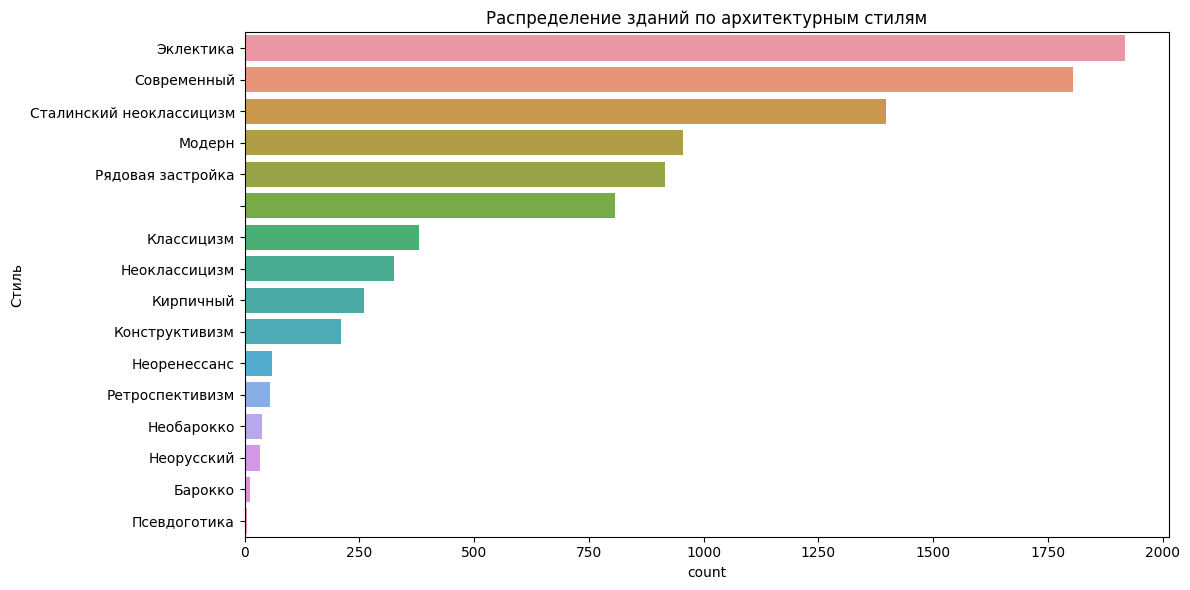

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Стиль', data=final_merged, order=final_merged['Стиль'].value_counts().index)
plt.title('Распределение зданий по архитектурным стилям')
plt.tight_layout()
plt.show()


## Распределение архитектурных стилей по историческим периодам

<Figure size 1400x800 with 0 Axes>

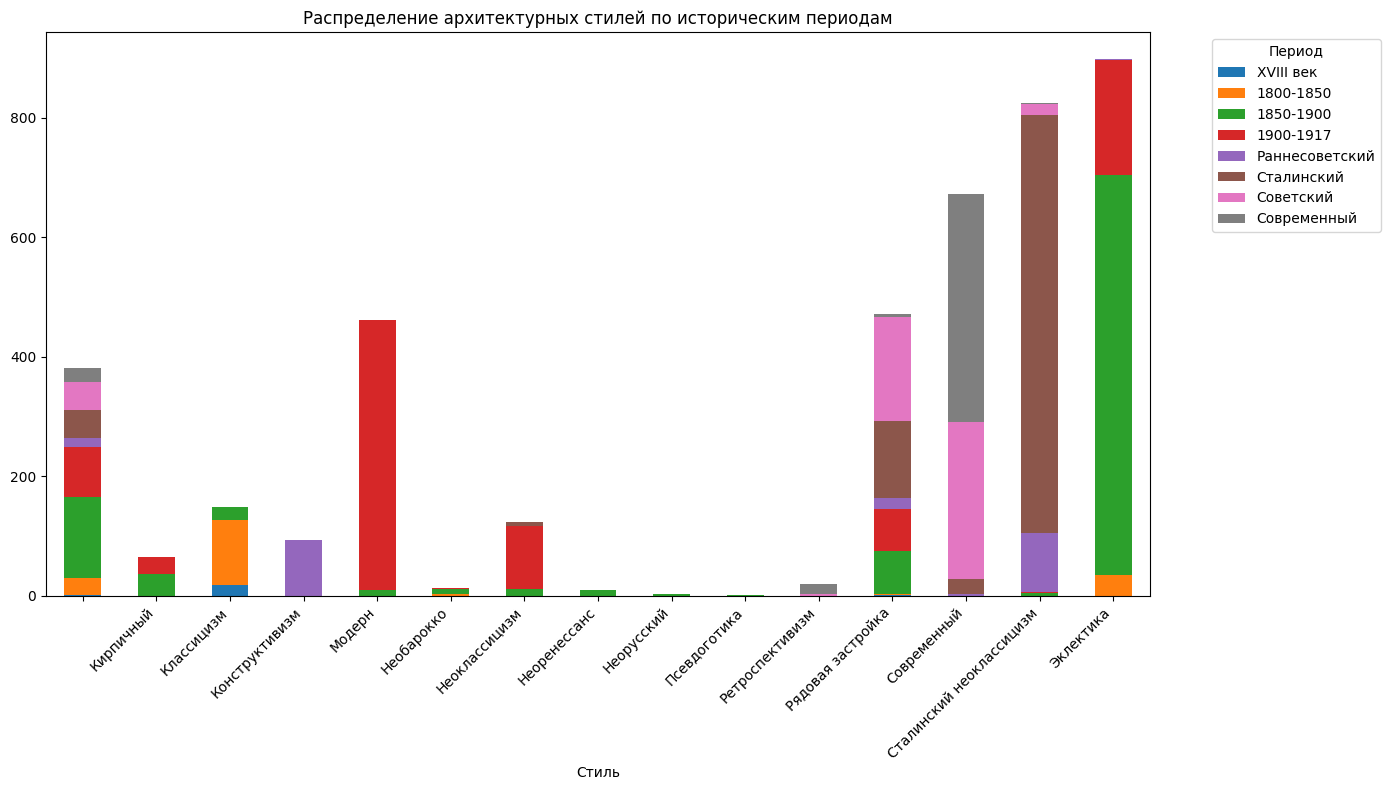

In [14]:
# Преобразуем столбец года в числовой формат
final_merged['Год постройки_citywalls'] = pd.to_numeric(final_merged['Год постройки_citywalls'], errors='coerce')

# Создаем временные периоды
final_merged['Период'] = pd.cut(final_merged['Год постройки_citywalls'], 
                     bins=[1700, 1800, 1850, 1900, 1917, 1940, 1960, 1990, 2023],
                     labels=['XVIII век', '1800-1850', '1850-1900', '1900-1917', 
                             'Раннесоветский', 'Сталинский', 'Советский', 'Современный'])

# Визуализация распределения стилей по периодам
plt.figure(figsize=(14, 8))
style_period = pd.crosstab(final_merged['Стиль'], final_merged['Период'])
style_period.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Распределение архитектурных стилей по историческим периодам')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Период', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Распределение комментариев по архитектурным стилям

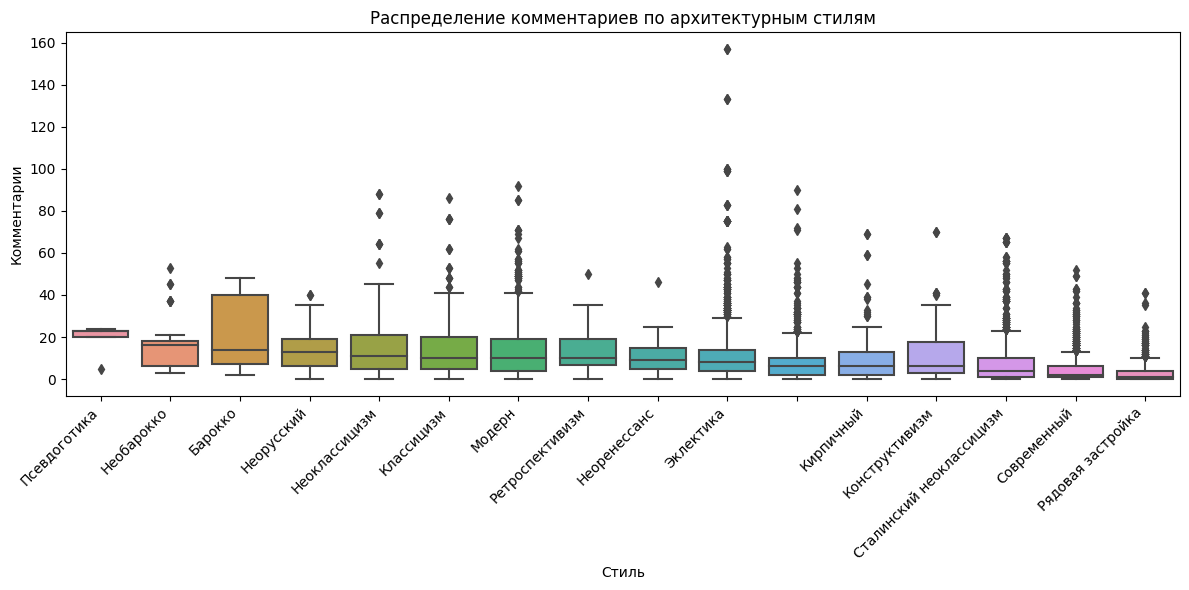

In [15]:
final_merged['Комментарии'] = pd.to_numeric(final_merged['Комментарии'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Стиль', y='Комментарии', data=final_merged, order=final_merged.groupby('Стиль')['Комментарии'].median().sort_values(ascending=False).index)
plt.title('Распределение комментариев по архитектурным стилям')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Облако слов из названий архитектурных объектов

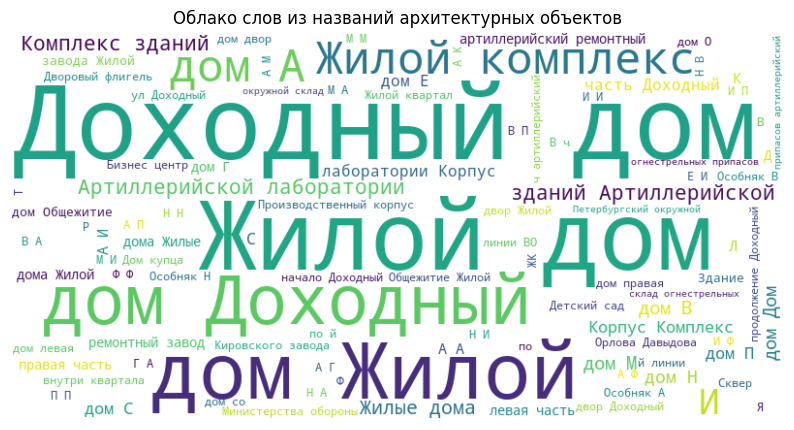

In [16]:

# Создаем строку из всех названий
all_names = ' '.join(final_merged['Название'].dropna())

# Генерируем облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_names)

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из названий архитектурных объектов')
plt.show()


In [17]:
final_merged.to_parquet('final_merged.parquet')

# Опишите возможные применения этих данных в контексте машинного обучения.

1. Классификация архитектурных объектов по стилю и типу
2. Построение Архитектурных туристических маршрутов
3. Выявление архитектурных кластеров
4. Интерактивная карта архитектурного наследия
5. Обнаружение и распознавание архитектурных элементов (например, фасадов, окон, декоративных деталей).
6. Классификация зданий по стилю на основе визуальных признаков.
7. Сегментация изображений для выделения отдельных элементов фасада.
8. Синтез новых архитектурных изображений
9. Обнаружение аномалий — (здания, которые не соответствуют типичному стилю или структуре для данной улицы или района)
10. Smart City - втоматического мониторинга состояния зданий, выявления изменений фасадов, а также для интеграции с IoT-устройствами, фиксирующими параметры окружающей среды и состояния объектов

# Итоговый вывод
Реализован dagster-пайплайн сбора и аггрегации данных. По выбранной методике аггрегации совпадение нашли себе не многим более 10 тыс. адресов.
Источники потенциально будут пополняться, а методы обьединения совершенствоваться, данный результат агрегации не конечный. 

Итоговый датасет содержит в себе большой кол-во пропусков, довольно полную информацию об архитектурных стилях. Набор признаков в датасете позволяет проводить широкую аналитику как внутри города, так и в рамках одного дома. Подобные датасеты при дальнейшем их дополнении геоданными данными о районах города, позволят применить их в довольно широком спектре областей.